In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('ex2data1.txt', header=None)
data.columns = ['a', 'b', 'label']
data.head()

,a,b,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


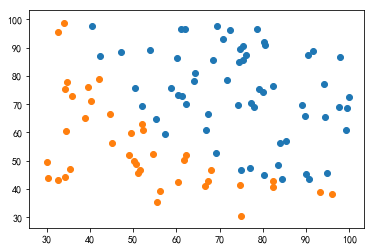

In [3]:
plt.scatter(data.loc[data.label==1]['a'],data.loc[data.label==1]['b'])
plt.scatter(data.loc[data.label==0]['a'],data.loc[data.label==0]['b'])

In [4]:
from sklearn import preprocessing
x_ = np.array(data.drop('label', axis=1))
y = np.array(data['label'])

x = preprocessing.scale(x_)

In [5]:
class LogisticRegression():
    def __init__(self, n_iter=1000, alpha=0.01):
        self.n_iter = n_iter
        self.alpha = alpha
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, x, y):
        self.w = np.zeros(x.shape[1])
        self.b = 0
        self.costs = []
        
        m = x.shape[0]
        
        for i in range(self.n_iter):
            z = np.dot(x, self.w) + self.b
            a = self.sigmoid(z)
            
            dw = 1 / m * np.dot(x.T, a-y)
            db = 1 / m * np.sum(a-y, axis=0)
            
            self.w -= self.alpha * dw
            self.b -= self.alpha * db
            
            cost = -1/m * np.sum(y*np.log(a) + (1-y)*np.log(1-a), axis=0)
            self.costs.append(cost)
    
    def predict(self, x):
        z = np.dot(x, self.w) + self.b
        y_ = (z > 0).astype(int)
        return y_

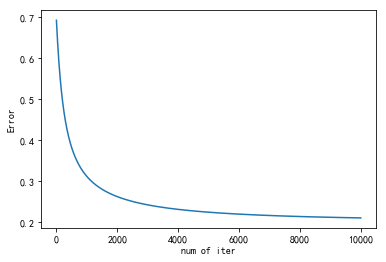

In [22]:
log = LogisticRegression(n_iter=10000)
log.fit(x,y)
plt.plot(log.costs)
plt.xlabel('num of iter')
plt.ylabel('Error')
plt.savefig('learning_rate.png', dpi=300)

In [7]:
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(y, log.predict(x))
print(accuracy1)

from sklearn.linear_model import LogisticRegression as LG
logist = LG()
logist.fit(x,y)
accuracy2 = accuracy_score(y, logist.predict(x))
print(accuracy2)

0.89
0.89


In [8]:
data2 = data.copy()
data2['a'] = x[:,0]
data2['b'] = x[:,1]

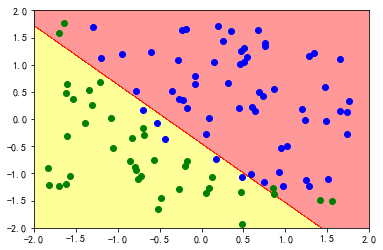

In [9]:
from matplotlib.colors import ListedColormap
xx1, xx2 = np.meshgrid(np.linspace(-2,2,1000), np.linspace(-2,2,1000))
Z = log.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)

colors = ('yellow','red' )
cmap = ListedColormap(colors[:len(np.unique(y))])
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)

plt.scatter(data2.loc[data2.label==1]['a'],data2.loc[data2.label==1]['b'],c ='blue')
plt.scatter(data2.loc[data2.label==0]['a'],data2.loc[data2.label==0]['b'],c ='green')

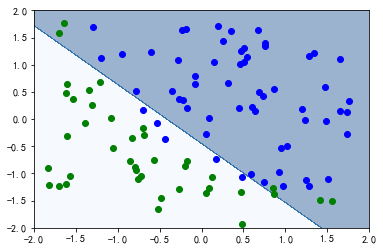

In [10]:
from matplotlib.colors import ListedColormap
xx1, xx2 = np.meshgrid(np.linspace(-2,2,1000), np.linspace(-2,2,1000))
Z = log.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)

#colors = ('yellow','red' )
#cmap = ListedColormap(colors[:len(np.unique(y))])
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=plt.cm.Blues)
#plt.contour(xx1, xx2, Z, alpha=0.4, colors='r')

plt.scatter(data2.loc[data2.label==1]['a'],data2.loc[data2.label==1]['b'],c ='blue')
plt.scatter(data2.loc[data2.label==0]['a'],data2.loc[data2.label==0]['b'],c ='green')

In [11]:
data3 = pd.read_csv('ex2data2.txt', header=None)
data3.columns = ['a', 'b', 'label']
data3.head()

,a,b,label
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


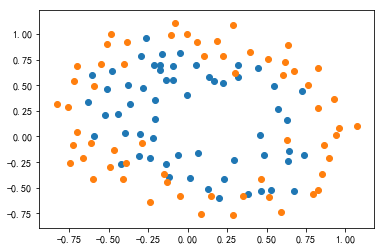

In [12]:
plt.scatter(data3.loc[data3.label==1]['a'],data3.loc[data3.label==1]['b'])
plt.scatter(data3.loc[data3.label==0]['a'],data3.loc[data3.label==0]['b'])

In [13]:
x2 = np.array(data3.drop('label', axis=1))
y2 = np.array(data3['label'])

In [14]:
def data_stack(x2, n=3):
    return np.column_stack((x2**i for i in range(n)))
x3 = data_stack(x2)

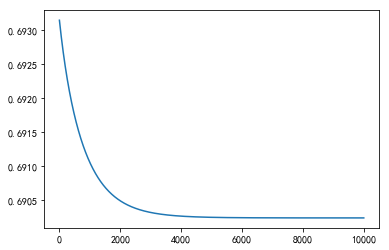

In [15]:
log = LogisticRegression(n_iter=10000)
log.fit(x2,y2)
plt.plot(log.costs)

In [16]:
log3 = LogisticRegression(n_iter=10000)
log3.fit(x3,y2)

In [17]:
from sklearn.metrics import accuracy_score
accuracy3 = accuracy_score(y2, log3.predict(x3))
print(accuracy3)

from sklearn.linear_model import LogisticRegression as LG
logist = LG()
logist.fit(x3,y2)
accuracy4 = accuracy_score(y2, logist.predict(x3))
print(accuracy4)

0.771186440678
0.771186440678


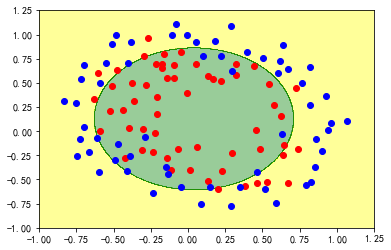

In [18]:
from matplotlib.colors import ListedColormap
xx1, xx2 = np.meshgrid(np.linspace(-1,1.25,1000), np.linspace(-1,1.25,1000))
Z = logist.predict(data_stack(np.array([xx1.ravel(), xx2.ravel()]).T))
Z = Z.reshape(xx1.shape)

colors = ('yellow','green' )
cmap = ListedColormap(colors[:len(np.unique(y))])
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)

plt.scatter(data3.loc[data3.label==1]['a'],data3.loc[data3.label==1]['b'], c='r')
plt.scatter(data3.loc[data3.label==0]['a'],data3.loc[data3.label==0]['b'], c='b')